In [10]:
from PIL import Image, ImageFilter
import numpy as np

In [11]:
photo_n = 578


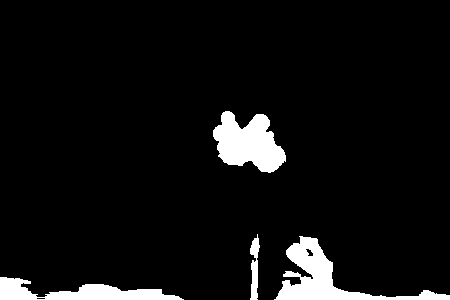

In [12]:
# Open the image file
threshold_mask = Image.open(f"samples/{photo_n}_depth.jpg")

# Convert the image to grayscale
threshold_mask = threshold_mask.convert("L")

# Define the threshold value
threshold = 155

# Apply the thresholding operation
threshold_mask = threshold_mask.point(lambda x: 0 if x < threshold else 255, "1")
threshold_mask.resize((450, 300))

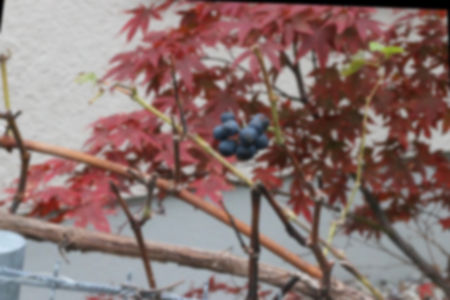

In [13]:
# Open the image file
original = Image.open(f"samples/{photo_n}.jpg")
target = Image.open(f"samples/{photo_n}_bokeh.jpg")

blur_img = original.filter(ImageFilter.GaussianBlur(radius=5))
blur_img.resize((450, 300))

In [14]:

# # Create a new image with the same dimensions as the original image
# result_img = Image.new("RGB", original.size)

# # Iterate over each pixel in the images and apply the mask
# for x in range(original.width):
#     for y in range(original.height):
#         mask_pixel = threshold_mask.getpixel((x, y))
#         if mask_pixel == 0:
#             # Use the corresponding pixel from the second image
#             pixel = blur_img.getpixel((x, y))
#         else:
#             # Use the corresponding pixel from the original image
#             pixel = original.getpixel((x, y))
#         # Set the pixel value in the result image
#         result_img.putpixel((x, y), pixel)
# # result_img

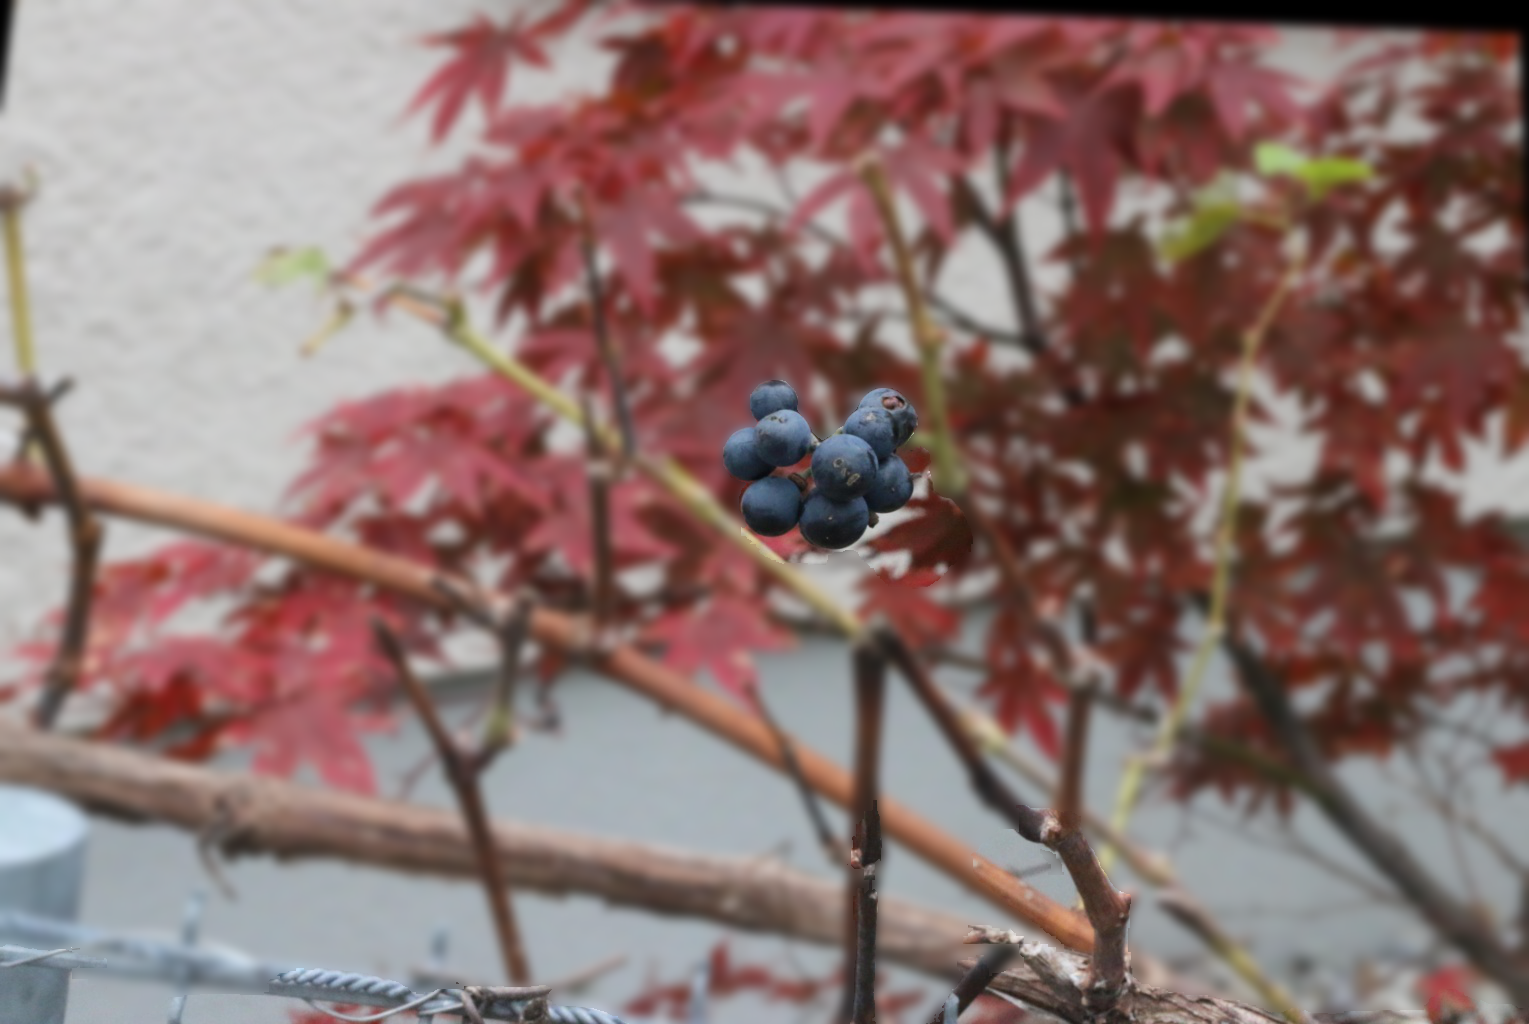

In [15]:
# Convert the images to numpy arrays
original_arr = np.array(original)
second_arr = np.array(blur_img)
mask_arr = np.array(threshold_mask)

# Create a boolean mask for the pixels with value 0 in the mask
zero_mask = mask_arr == 0

# Create a new array with the same shape as the original arrays
result_arr = np.empty_like(original_arr)

# Copy the corresponding pixels from the original and second arrays to the result array
result_arr[zero_mask] = second_arr[zero_mask]
result_arr[~zero_mask] = original_arr[~zero_mask]

# Convert the result array back to a Pillow image
result_img = Image.fromarray(result_arr)
result_img

In [16]:
ground_truth = Image.open(f"samples/{photo_n}_bokeh.jpg")
np.array(ground_truth).shape, np.array(result_img).shape

((1024, 1529, 3), (1024, 1529, 3))

In [17]:
from utils import calculate_psnr, calculate_ssim, calculate_lpips

In [18]:
psnr = calculate_psnr(np.array(result_img), np.array(ground_truth))
ssim = calculate_ssim(np.array(result_img), np.array(ground_truth))

psnr, ssim

(17.13666698680139, 0.6734956864306995)